<a href="https://colab.research.google.com/github/AnjaneyaBhardwaj/CSE-556-Project/blob/update_branch/multi_agent_intrusion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
!pip install paramiko
# STEP 1: Start fresh - remove old directory if it exists
!rm -rf CybORG_plus_plus
!git clone https://github.com/alan-turing-institute/CybORG_plus_plus

# STEP 2: Install dependencies (DON'T change directory yet)
!pip install -q gym==0.21.0 numpy networkx prettytable ipython

# STEP 3: Add to Python path directly (NO cd commands)
import sys
sys.path.insert(0, '/content/CybORG_plus_plus/Debugged_CybORG/CybORG')

# STEP 4: Now import works
import inspect
from CybORG import CybORG
from CybORG.Agents import B_lineAgent, SleepAgent
from CybORG.Agents.Wrappers import ChallengeWrapper

# STEP 5: Get scenario path
path = str(inspect.getfile(CybORG))
path = path[:-10] + '/Shared/Scenarios/Scenario2.yaml'

# STEP 6: Create environment
cyborg = CybORG(path, 'sim', agents={'Red': B_lineAgent})

env = ChallengeWrapper(env=cyborg, agent_name='Blue')

# STEP 7: Test it
obs, info = env.reset()
print("="*60)
print("✓ SUCCESS! CybORG++ is now working!")
print("="*60)
print(f"Observation shape: {obs.shape}")
print(f"Action space size: {env.action_space.n}")

# Run a quick episode
done = False
total_reward = 0
step = 0
# Modify step to unpack 5 values
while not done and step < 100:
    action = env.action_space.sample()  # Random action
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated  # Update done condition
    total_reward += reward
    step += 1

print(f"\nCompleted {step} steps")
print(f"Total reward: {total_reward:.2f}")

Cloning into 'CybORG_plus_plus'...
remote: Enumerating objects: 857, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 857 (delta 20), reused 25 (delta 9), pack-reused 797 (from 2)
Receiving objects: 100% (857/857), 1.43 MiB | 4.72 MiB/s, done.
Resolving deltas: 100% (300/300), done.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
✓ SUCCESS! CybORG++ is now working!
Observation shape: (52,)
Action space size: 145

Completed 100 steps
Total reward: -144.80


In [105]:
# Cell 1: Imports + Config
import torch, random, numpy as np
from dataclasses import dataclass

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

@dataclass
class Config:
    seed: int = 42
    max_episode_steps: int = 64
    hidden_dim: int = 64

cfg = Config()
random.seed(cfg.seed)
np.random.seed(cfg.seed)
torch.manual_seed(cfg.seed)
if device.type == "cuda":
    torch.cuda.manual_seed_all(cfg.seed)


# Dynamically find correct path for YAML
import inspect, os
from pathlib import Path

cyborg_file = Path(inspect.getfile(CybORG))         # .../Debugged_CybORG/CybORG/CybORG.py
base_dir = cyborg_file.parent                       # .../Debugged_CybORG/CybORG
scenario_path = base_dir / "Shared" / "Scenarios" / "Scenario2.yaml"

if not scenario_path.exists():
    raise FileNotFoundError(f"❌ Scenario2.yaml not found at {scenario_path}")
print("✅ Scenario path found:", scenario_path)


Using device: cuda
✅ Scenario path found: /content/CybORG_plus_plus/Debugged_CybORG/CybORG/CybORG/Shared/Scenarios/Scenario2.yaml


In [106]:
# Create the environment from YAML
cyborg = CybORG(str(scenario_path), 'sim', agents={'Red': B_lineAgent})
env = ChallengeWrapper(env=cyborg, agent_name='Blue')

# Reset and test a short episode
obs, info = env.reset()
print("="*60)
print("✓ SUCCESS! Debugged CybORG environment ready.")
print("="*60)
print(f"Observation type: {type(obs)}")
print(f"Action space: {env.action_space}")

done = False
total_reward = 0
step = 0
while not done and step < 50:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward
    step += 1

print(f"Completed {step} steps | Total reward: {total_reward:.2f}")


✓ SUCCESS! Debugged CybORG environment ready.
Observation type: <class 'numpy.ndarray'>
Action space: Discrete(145)
Completed 50 steps | Total reward: -490.80


In [107]:
# === Cell 4: Confirm Scenario Path & Load Environment ===
import inspect
from pathlib import Path
from CybORG import CybORG
from CybORG.Agents import B_lineAgent, SleepAgent
from CybORG.Agents.Wrappers import ChallengeWrapper

# Dynamically resolve correct scenario file
cyborg_file = Path(inspect.getfile(CybORG))
scenario_path = cyborg_file.parent / "Shared" / "Scenarios" / "Scenario1b.yaml"
assert scenario_path.exists(), f"Scenario YAML not found: {scenario_path}"

print("✅ Using Scenario YAML:", scenario_path)

# Build environment (Debugged_CybORG version)
cyborg = CybORG(str(scenario_path), 'sim', agents={'Red': B_lineAgent})
env = ChallengeWrapper(env=cyborg, agent_name='Blue')

# Basic reset
obs, info = env.reset()
print("Observation type:", type(obs))
print("Action space:", env.action_space)


✅ Using Scenario YAML: /content/CybORG_plus_plus/Debugged_CybORG/CybORG/CybORG/Shared/Scenarios/Scenario1b.yaml
Observation type: <class 'numpy.ndarray'>
Action space: Discrete(54)


In [108]:
# === Cell 5: Run a Short Test Episode ===
done = False
total_reward = 0.0
steps = 0

while not done and steps < 100:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward
    steps += 1

print("="*60)
print("✓ Debugged_CybORG scenario test complete.")
print("="*60)
print(f"Total steps: {steps}")
print(f"Total reward: {total_reward:.2f}")


✓ Debugged_CybORG scenario test complete.
Total steps: 100
Total reward: -1046.50


In [109]:
# === Cell 6: PettingZoo-like Wrapper ===
class DebuggedCyborgWrapper:
    """Thin adapter to mimic PettingZoo's multi-agent interface for later phases."""
    def __init__(self, env, max_steps=64):
        self.env = env
        self.max_steps = max_steps
        self.t = 0
        self.agents = ['Blue']  # Blue is the controlled agent
        self.action_space = env.action_space

    def reset(self):
        self.t = 0
        obs, info = self.env.reset()
        return obs, info

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.t += 1
        if self.t >= self.max_steps:
            truncated = True
        return obs, reward, terminated, truncated, info

wrapper = DebuggedCyborgWrapper(env, max_steps=64)
print("✅ Wrapper ready. Controlled agent:", wrapper.agents)


✅ Wrapper ready. Controlled agent: ['Blue']


TESTING IMPROVED GRAPH EXTRACTION

Hosts: ['Defender', 'Enterprise0', 'Enterprise1', 'Enterprise2', 'Op_Host0', 'Op_Host1', 'Op_Host2', 'Op_Server0', 'User0', 'User1', 'User2', 'User3', 'User4']
Adjacency shape: (13, 13) | Node feature shape: (13, 10)
Non-zero connections: 22 edges


/tmp/ipython-input-1005507201.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


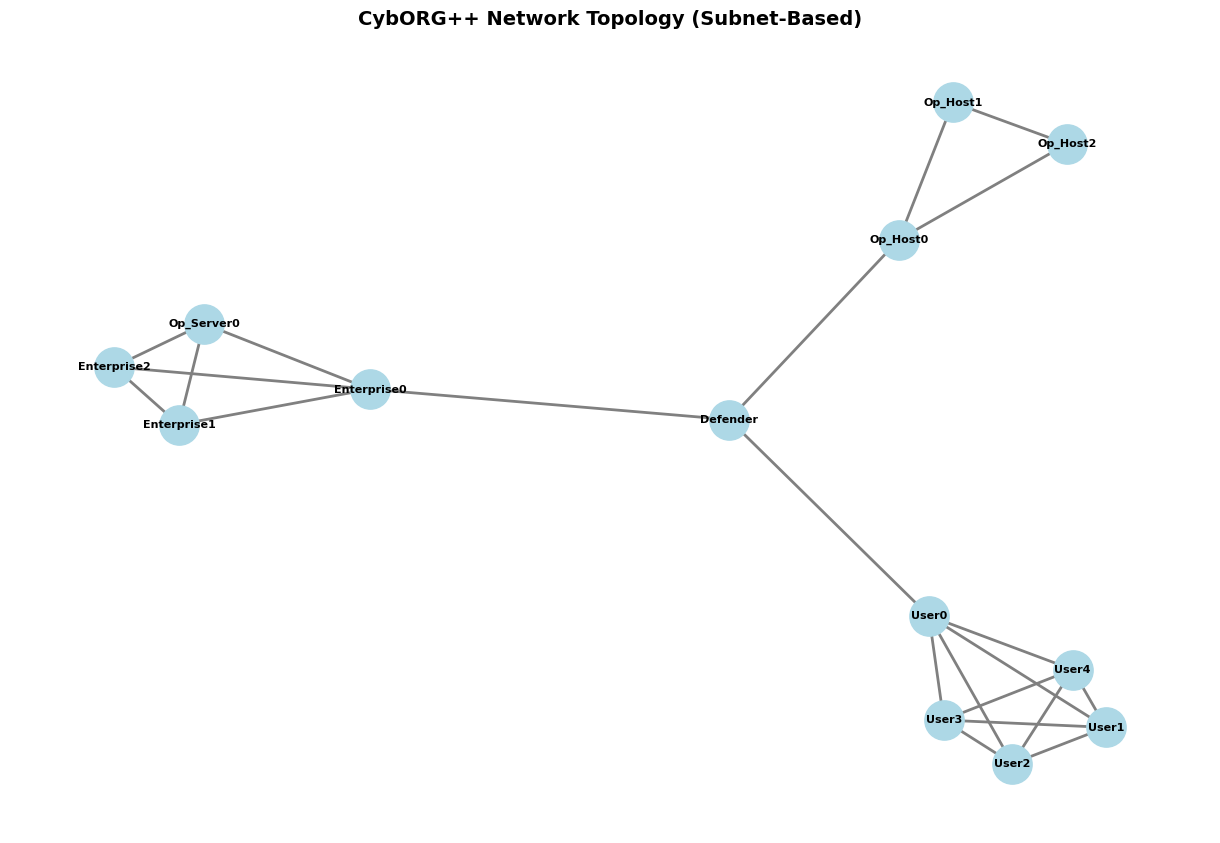

In [117]:
# 🧠 Phase 3 (Bulletproof Runtime Graph Builder)
# ----------------------------------------------
# Handles all structures (interface connections, subnets as list/dict, etc.)
# and guarantees a valid adjacency for CybORG++ runtime.

import numpy as np

# === Improved Graph Extraction ===
# === IMPROVED GRAPH EXTRACTION WITH SUBNET STRUCTURE ===

def get_graph_with_subnet_structure(cyborg):
    """
    Extract graph with realistic subnet-based topology for CybORG Scenario 2
    Based on: Subnet 1 (Users), Subnet 2 (Enterprise), Subnet 3 (Operational)
    """
    state = cyborg.environment_controller.state
    hosts = list(state.hosts.keys())
    n = len(hosts)
    host_to_idx = {h: i for i, h in enumerate(hosts)}

    A = np.zeros((n, n), dtype=np.float32)
    X = np.zeros((n, 10), dtype=np.float32)

    # Categorize hosts by subnet based on naming convention
    subnet_1 = [h for h in hosts if 'User' in h]  # User hosts
    subnet_2 = [h for h in hosts if 'Enterprise' in h or 'Op_Server' in h]  # Enterprise/servers
    subnet_3 = [h for h in hosts if 'Op_Host' in h]  # Operational hosts
    gateway = [h for h in hosts if 'Defender' in h]  # Gateway/defender

    # print(f"📊 Detected Subnets:")
    # print(f"  Gateway: {gateway}")
    # print(f"  Subnet 1 (Users): {subnet_1}")
    # print(f"  Subnet 2 (Enterprise): {subnet_2}")
    # print(f"  Subnet 3 (Operations): {subnet_3}")

    # Extract node features (same as before)
    for i, host_name in enumerate(hosts):
        host = state.hosts[host_name]
        os_type = str(getattr(host, "os_type", "Unknown"))

        X[i, 0] = 1.0 if "Windows" in os_type else 0.0
        X[i, 1] = 1.0 if "Linux" in os_type else 0.0
        X[i, 2] = len(getattr(host, "processes", []))
        X[i, 3] = len(getattr(host, "services", []))
        X[i, 4] = len(getattr(host, "sessions", []))

        access = getattr(host, "access", None)
        if access == "Privileged":
            X[i, 5] = 1.0
        elif access == "User":
            X[i, 5] = 0.5

        # Subnet identifier
        if host_name in subnet_1:
            X[i, 6] = 0.33
        elif host_name in subnet_2:
            X[i, 6] = 0.66
        elif host_name in subnet_3:
            X[i, 6] = 1.0

        X[i, 7] = float(i) / n
        X[i, 8] = 1.0 if getattr(host, "compromised", False) else 0.0
        X[i, 9] = len(getattr(host, "vulnerabilities", []))

    # Build edges based on realistic network topology
    edge_count = 0

    def connect_subnet(subnet_hosts):
        """Connect hosts within a subnet (fully connected within subnet)"""
        nonlocal edge_count
        for h1 in subnet_hosts:
            for h2 in subnet_hosts:
                if h1 != h2:
                    i, j = host_to_idx[h1], host_to_idx[h2]
                    if A[i, j] == 0:
                        A[i, j] = A[j, i] = 1
                        edge_count += 1

    # Strategy: Subnets are internally connected, gateway connects to one node per subnet

    # 1. Connect within each subnet
    if len(subnet_1) > 1:
        connect_subnet(subnet_1)
        # print(f"  ✓ Connected Subnet 1: {edge_count} edges")

    if len(subnet_2) > 1:
        connect_subnet(subnet_2)
        # print(f"  ✓ Connected Subnet 2: {edge_count} edges")

    if len(subnet_3) > 1:
        connect_subnet(subnet_3)
        # print(f"  ✓ Connected Subnet 3: {edge_count} edges")

    # 2. Connect gateway to one representative from each subnet
    if gateway:
        gw_idx = host_to_idx[gateway[0]]

        # Connect to first host of each subnet (subnet gateways)
        for subnet in [subnet_1, subnet_2, subnet_3]:
            if subnet:
                rep_idx = host_to_idx[subnet[0]]
                A[gw_idx, rep_idx] = A[rep_idx, gw_idx] = 1
                edge_count += 1

        # print(f"  ✓ Connected Gateway to subnets: {edge_count} edges")

    # 3. If still no edges (shouldn't happen), use star topology
    if edge_count == 0:
        print("  ⚠️ Falling back to star topology")
        hub_idx = 0
        for i in range(1, n):
            A[hub_idx, i] = A[i, hub_idx] = 1
            edge_count += 1

    # Edge features
    E = np.zeros((n, n, 2), dtype=np.float32)
    E[..., 0] = A
    E[..., 1] = np.random.uniform(0.1, 1.0, size=(n, n)) * A

    # print(f"\n✅ Built realistic graph: {n} nodes, {edge_count} edges")
    return A, X, E, hosts

# Test the improved extraction
print("=" * 60)
print("TESTING IMPROVED GRAPH EXTRACTION")
print("=" * 60)

A, X, E, hosts = get_graph_with_subnet_structure(cyborg)

print(f"\nHosts: {hosts}")
print(f"Adjacency shape: {A.shape} | Node feature shape: {X.shape}")
print(f"Non-zero connections: {np.sum(A) / 2:.0f} edges")

# Visualize the improved topology
import matplotlib.pyplot as plt
import networkx as nx

G_improved = nx.from_numpy_array(A)
pos = nx.spring_layout(G_improved, seed=42)

plt.figure(figsize=(12, 8))
nx.draw(G_improved, pos,
        node_color='lightblue',
        node_size=800,
        with_labels=True,
        labels={i: hosts[i] for i in range(len(hosts))},
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        width=2)
plt.title("CybORG++ Network Topology (Subnet-Based)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=" * 60)






In [110]:
# === Cell 8: Convert numpy → torch ===
device = "cuda" if torch.cuda.is_available() else "cpu"

def to_torch_graph(A, X, E, device=device):
    A = torch.tensor(A, dtype=torch.float32, device=device)
    X = torch.tensor(X, dtype=torch.float32, device=device)
    E = torch.tensor(E, dtype=torch.float32, device=device)
    return A, X, E

A_t, X_t, E_t = to_torch_graph(A, X, E)
print("Torch Graph Shapes:", A_t.shape, X_t.shape, E_t.shape)


Torch Graph Shapes: torch.Size([13, 13]) torch.Size([13, 10]) torch.Size([13, 13, 2])


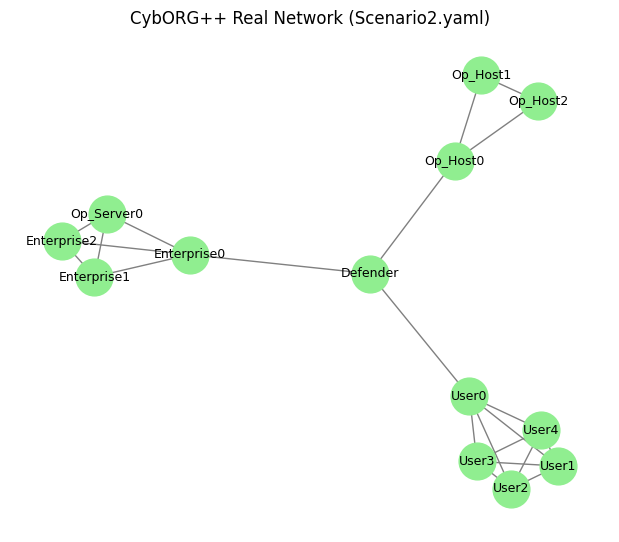

In [111]:
# === Cell 9: Visualize Real Topology ===
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
G = nx.from_numpy_array(A)
nx.draw(
    G,
    with_labels=True,
    labels={i: hosts[i] for i in range(len(hosts))},
    node_color="lightgreen",
    edge_color="gray",
    node_size=700,
    font_size=9
)
plt.title("CybORG++ Real Network (Scenario2.yaml)")
plt.show()


In [112]:
# === Phase 4: GNN Encoder (GraphSAGE-style) ===
import torch.nn as nn
import torch.nn.functional as F

# === Fixed GraphSAGE Implementation ===
class GraphSAGE(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, dropout=0.1):
        super().__init__()
        self.dropout = dropout

        # Separate transformations for neighbor aggregation and self-features
        self.lin_neighbor_1 = nn.Linear(in_dim, hidden_dim, bias=True)
        self.lin_self_1 = nn.Linear(in_dim, hidden_dim, bias=True)

        self.lin_neighbor_2 = nn.Linear(hidden_dim, out_dim, bias=True)
        self.lin_self_2 = nn.Linear(hidden_dim, out_dim, bias=True)

    def aggregate(self, A, X):
        """Mean aggregation of neighbor features"""
        # Normalize by degree (row sum of adjacency matrix)
        degree = A.sum(dim=1, keepdim=True) + 1e-6  # Add epsilon to avoid division by zero
        A_norm = A / degree
        return torch.matmul(A_norm, X)  # [num_nodes, feature_dim]

    def forward(self, A, X):
        # Layer 1
        h_neighbors = self.lin_neighbor_1(self.aggregate(A, X))
        h_self = self.lin_self_1(X)
        h = F.relu(h_neighbors + h_self)  # Combine neighbor and self
        h = F.dropout(h, self.dropout, training=self.training)

        # Layer 2
        h_neighbors = self.lin_neighbor_2(self.aggregate(A, h))
        h_self = self.lin_self_2(h)
        out = h_neighbors + h_self  # Combine neighbor and self

        return out  # [num_nodes, out_dim]

# Initialize correctly
gnn = GraphSAGE(in_dim=10, hidden_dim=64, out_dim=32, dropout=0.1).to(device)


# Example instantiation
# in_dim = X_t.shape[1]
# hidden_dim = 64
# out_dim = 64
# encoder = GraphSAGE(in_dim, hidden_dim, out_dim).to(device)
print("✅ GraphSAGE Encoder ready:", gnn)


✅ GraphSAGE Encoder ready: GraphSAGE(
  (lin_neighbor_1): Linear(in_features=10, out_features=64, bias=True)
  (lin_self_1): Linear(in_features=10, out_features=64, bias=True)
  (lin_neighbor_2): Linear(in_features=64, out_features=32, bias=True)
  (lin_self_2): Linear(in_features=64, out_features=32, bias=True)
)


In [113]:
# === MAPPO Actor-Critic Networks ===
import torch
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    """
    Actor network for MAPPO - outputs action probabilities
    Takes individual agent's node embedding as input (decentralized execution)
    """
    def __init__(self, node_embedding_dim, action_dim, hidden_dim=128):
        super().__init__()
        self.fc1 = nn.Linear(node_embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.action_head = nn.Linear(hidden_dim, action_dim)

    def forward(self, node_embedding):
        """
        Args:
            node_embedding: [batch_size, node_embedding_dim] - embedding from GNN for agent's node
        Returns:
            action_logits: [batch_size, action_dim] - unnormalized action probabilities
        """
        x = F.relu(self.fc1(node_embedding))
        x = F.relu(self.fc2(x))
        action_logits = self.action_head(x)
        return action_logits

    def get_action(self, node_embedding, deterministic=False):
        """
        Sample action from policy
        Args:
            node_embedding: [node_embedding_dim] - single agent observation
            deterministic: if True, take argmax instead of sampling
        Returns:
            action: int - selected action
            log_prob: tensor - log probability of action
            entropy: tensor - policy entropy
        """
        logits = self.forward(node_embedding.unsqueeze(0))  # Add batch dim
        dist = torch.distributions.Categorical(logits=logits)

        if deterministic:
            action = logits.argmax(dim=-1)
        else:
            action = dist.sample()

        log_prob = dist.log_prob(action)
        entropy = dist.entropy()

        return action.item(), log_prob, entropy

class Critic(nn.Module):
    """
    Critic network for MAPPO - outputs state value
    Takes global graph embedding as input (centralized training)
    """
    def __init__(self, graph_embedding_dim, hidden_dim=128):
        super().__init__()
        self.fc1 = nn.Linear(graph_embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.value_head = nn.Linear(hidden_dim, 1)

    def forward(self, graph_embedding):
        """
        Args:
            graph_embedding: [batch_size, graph_embedding_dim] - global state from GNN
        Returns:
            value: [batch_size] - estimated state value
        """
        x = F.relu(self.fc1(graph_embedding))
        x = F.relu(self.fc2(x))
        value = self.value_head(x)
        return value.squeeze(-1)  # Remove last dimension

# Initialize the networks
print("=" * 60)
print("INITIALIZING MAPPO NETWORKS")
print("=" * 60)

# Define dimensions based on your setup
node_embedding_dim = 32  # This should match your GraphSAGE output dimension
action_dim = 145  # From CybORG Scenario2 (or 54 for Scenario1b)
graph_embedding_dim = 32  # Same as node embedding (we'll use mean pooling)

# Create networks on the correct device
blue_actor = Actor(node_embedding_dim, action_dim, hidden_dim=128).to(device)
red_actor = Actor(node_embedding_dim, action_dim, hidden_dim=128).to(device)
critic = Critic(graph_embedding_dim, hidden_dim=128).to(device)

# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"✓ Blue Actor:")
print(f"    Input: {node_embedding_dim}, Output: {action_dim}")
print(f"    Parameters: {count_parameters(blue_actor):,}")
print(f"\n✓ Red Actor:")
print(f"    Input: {node_embedding_dim}, Output: {action_dim}")
print(f"    Parameters: {count_parameters(red_actor):,}")
print(f"\n✓ Critic:")
print(f"    Input: {graph_embedding_dim}, Output: 1")
print(f"    Parameters: {count_parameters(critic):,}")
print(f"\n✓ All networks on device: {device}")
print("=" * 60)


INITIALIZING MAPPO NETWORKS
✓ Blue Actor:
    Input: 32, Output: 145
    Parameters: 39,441

✓ Red Actor:
    Input: 32, Output: 145
    Parameters: 39,441

✓ Critic:
    Input: 32, Output: 1
    Parameters: 20,865

✓ All networks on device: cuda


In [114]:
# === TEST COMPLETE PIPELINE ===
print("=" * 60)
print("TESTING COMPLETE PIPELINE: GNN + ACTOR + CRITIC")
print("=" * 60)

# 1. Convert graph to PyTorch
A_torch = torch.FloatTensor(A).to(device)
X_torch = torch.FloatTensor(X).to(device)

print(f"\n1. Graph Data:")
print(f"   Adjacency: {A_torch.shape} on {A_torch.device}")
print(f"   Features: {X_torch.shape} on {X_torch.device}")

# 2. Pass through GraphSAGE (use your fixed GraphSAGE)
gnn.eval()
with torch.no_grad():
    node_embeddings = gnn(A_torch, X_torch)  # [13, 32]

print(f"\n2. GNN Output:")
print(f"   Node embeddings: {node_embeddings.shape}")
print(f"   Range: [{node_embeddings.min():.3f}, {node_embeddings.max():.3f}]")

# 3. Get action from actor (for first agent - Defender)
defender_embedding = node_embeddings[0]  # Get Defender's embedding
action, log_prob, entropy = blue_actor.get_action(defender_embedding)

print(f"\n3. Actor Output (Blue/Defender):")
print(f"   Selected action: {action}")
print(f"   Log probability: {log_prob.item():.4f}")
print(f"   Policy entropy: {entropy.item():.4f}")

# 4. Get state value from critic (using mean pooled graph embedding)
graph_embedding = node_embeddings.mean(dim=0, keepdim=True)  # [1, 32]
value = critic(graph_embedding)

print(f"\n4. Critic Output:")
print(f"   Graph embedding: {graph_embedding.shape}")
print(f"   State value: {value.item():.4f}")

# 5. Test batch processing
batch_size = 4
fake_batch_embeddings = node_embeddings[:batch_size]  # Take first 4 nodes
logits = blue_actor(fake_batch_embeddings)

print(f"\n5. Batch Processing Test:")
print(f"   Input: {fake_batch_embeddings.shape}")
print(f"   Actor output logits: {logits.shape}")
print(f"   Action probabilities sum to 1: {torch.softmax(logits, dim=-1).sum(dim=1).tolist()}")

print("\n" + "=" * 60)
print("✓ COMPLETE PIPELINE TEST PASSED!")
print("All components working: Graph → GNN → Actor/Critic")
print("=" * 60)


TESTING COMPLETE PIPELINE: GNN + ACTOR + CRITIC

1. Graph Data:
   Adjacency: torch.Size([13, 13]) on cuda:0
   Features: torch.Size([13, 10]) on cuda:0

2. GNN Output:
   Node embeddings: torch.Size([13, 32])
   Range: [-8.768, 4.750]

3. Actor Output (Blue/Defender):
   Selected action: 74
   Log probability: -4.9739
   Policy entropy: 4.9248

4. Critic Output:
   Graph embedding: torch.Size([1, 32])
   State value: 0.2185

5. Batch Processing Test:
   Input: torch.Size([4, 32])
   Actor output logits: torch.Size([4, 145])
   Action probabilities sum to 1: [0.9999999403953552, 1.0, 1.0, 1.0]

✓ COMPLETE PIPELINE TEST PASSED!
All components working: Graph → GNN → Actor/Critic


In [115]:
# === Cell 13: Rollout Buffer (store per-step graphs) ===
import torch

class RolloutBuffer:
    def __init__(self):
        self.A_list = []
        self.X_list = []
        self.actions = []
        self.rewards = []
        self.values = []
        self.logprobs = []
        self.dones = []

    def store(self, A_t, X_t, action, reward, value, logprob, done):
        # Store tensors detached to avoid growing graph
        self.A_list.append(A_t.detach())
        self.X_list.append(X_t.detach())
        self.actions.append(int(action))
        self.rewards.append(float(reward))
        self.values.append(float(value))
        self.logprobs.append(float(logprob))
        self.dones.append(bool(done))

    def clear(self):
        self.A_list.clear()
        self.X_list.clear()
        self.actions.clear()
        self.rewards.clear()
        self.values.clear()
        self.logprobs.clear()
        self.dones.clear()

    def to_tensors(self, device):
        actions  = torch.tensor(self.actions,  dtype=torch.long,   device=device)
        rewards  = torch.tensor(self.rewards,  dtype=torch.float32,device=device)
        values   = torch.tensor(self.values,   dtype=torch.float32,device=device)
        logprobs = torch.tensor(self.logprobs, dtype=torch.float32,device=device)
        dones    = torch.tensor(self.dones,    dtype=torch.float32,device=device)
        return actions, rewards, values, logprobs, dones

def compute_gae_torch(rewards, values, dones, gamma=0.99, lam=0.95):
    T = rewards.shape[0]
    adv = torch.zeros(T, dtype=torch.float32, device=rewards.device)
    last_gae = 0.0
    # Append a bootstrap value of 0 at terminal
    values_ext = torch.cat([values, torch.zeros(1, device=values.device)])
    for t in reversed(range(T)):
        nonterminal = 1.0 - dones[t]
        delta = rewards[t] + gamma * values_ext[t+1] * nonterminal - values_ext[t]
        last_gae = delta + gamma * lam * nonterminal * last_gae
        adv[t] = last_gae
    returns = adv + values
    return adv, returns

buffer = RolloutBuffer()
print("✅ Rollout buffer ready.")


✅ Rollout buffer ready.


In [118]:
# === COMPLETE TRAINING LOOP WITH MAPPO ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

print("=" * 60)
print("STARTING MAPPO TRAINING")
print("=" * 60)

# Training hyperparameters
num_episodes = 100  # Start with 100 episodes
max_steps = 50      # Max steps per episode
num_ppo_epochs = 4  # Number of PPO update epochs
clip_epsilon = 0.2  # PPO clipping parameter
gamma = 0.99        # Discount factor
gae_lambda = 0.95   # GAE lambda
value_coef = 0.5    # Value loss coefficient
entropy_coef = 0.01 # Entropy bonus coefficient
max_grad_norm = 0.5 # Gradient clipping

# Optimizer for all networks
all_params = list(gnn.parameters()) + list(blue_actor.parameters()) + list(critic.parameters())
optimizer = torch.optim.Adam(all_params, lr=3e-4)

# Training loop
for episode in range(num_episodes):
    # Reset environment
    obs, info = env.reset()
    done = False
    step = 0
    episode_reward = 0

    # Storage for trajectory
    states_A = []
    states_X = []
    actions = []
    rewards = []
    values = []
    log_probs = []
    dones = []

    # ===== ROLLOUT PHASE: Collect trajectory =====
    while not done and step < max_steps:
        # 1. Extract graph from current state
        A_np, X_np, E_np, hosts = get_graph_with_subnet_structure(cyborg)
        A_t, X_t, E_t = to_torch_graph(A_np, X_np, E_np)

        # 2. Forward pass through GNN
        with torch.no_grad():
            node_embs = gnn(A_t, X_t)  # [num_nodes, 32]

            # 3. Get action from Actor (use Defender node - index 0)
            defender_emb = node_embs[0].unsqueeze(0)  # [1, 32]
            action_logits = blue_actor(defender_emb)  # [1, action_dim]
            dist = torch.distributions.Categorical(logits=action_logits)

            # 4. Get value from Critic (use mean-pooled graph embedding)
            graph_emb = node_embs.mean(dim=0, keepdim=True)  # [1, 32]
            value = critic(graph_emb).squeeze()  # scalar

            # 5. Sample action
            action = dist.sample()
            log_prob = dist.log_prob(action)

        # Convert to valid action index
        action_idx = int(action.item())
        action_idx = max(0, min(action_idx, env.action_space.n - 1))

        # 6. Step environment
        obs, reward, terminated, truncated, info = env.step(action_idx)
        done = terminated or truncated

        # 7. Store step data
        states_A.append(A_t)
        states_X.append(X_t)
        actions.append(action_idx)
        rewards.append(float(reward))
        values.append(value.item())
        log_probs.append(log_prob.item())
        dones.append(done)

        episode_reward += float(reward)
        step += 1

    # ===== ADVANTAGE COMPUTATION (GAE) =====
    advantages = []
    returns = []
    gae = 0
    next_value = 0

    # Compute advantages in reverse
    for t in reversed(range(len(rewards))):
        if t == len(rewards) - 1:
            next_non_terminal = 0.0
            next_value = 0
        else:
            next_non_terminal = 1.0 - dones[t]
            next_value = values[t + 1]

        # TD error
        delta = rewards[t] + gamma * next_value * next_non_terminal - values[t]

        # GAE
        gae = delta + gamma * gae_lambda * next_non_terminal * gae
        advantages.insert(0, gae)
        returns.insert(0, gae + values[t])

    # Convert to tensors
    advantages = torch.tensor(advantages, dtype=torch.float32, device=device)
    returns = torch.tensor(returns, dtype=torch.float32, device=device)
    old_log_probs = torch.tensor(log_probs, dtype=torch.float32, device=device)
    actions_tensor = torch.tensor(actions, dtype=torch.long, device=device)

    # Normalize advantages
    if len(advantages) > 1:
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

    # ===== PPO UPDATE PHASE =====
    for ppo_epoch in range(num_ppo_epochs):
        # Lists to accumulate losses
        policy_losses = []
        value_losses = []
        entropy_losses = []

        # Update on each timestep in trajectory
        for t in range(len(states_A)):
            # Get stored states
            A_t = states_A[t]
            X_t = states_X[t]

            # Forward pass
            node_embs = gnn(A_t, X_t)

            # Actor forward
            defender_emb = node_embs[0].unsqueeze(0)
            action_logits = blue_actor(defender_emb)
            dist = torch.distributions.Categorical(logits=action_logits)

            # Critic forward
            graph_emb = node_embs.mean(dim=0, keepdim=True)
            value_pred = critic(graph_emb).squeeze()

            # Compute new log prob and entropy
            new_log_prob = dist.log_prob(actions_tensor[t])
            entropy = dist.entropy()

            # PPO policy loss
            ratio = torch.exp(new_log_prob - old_log_probs[t])
            surr1 = ratio * advantages[t]
            surr2 = torch.clamp(ratio, 1.0 - clip_epsilon, 1.0 + clip_epsilon) * advantages[t]
            policy_loss = -torch.min(surr1, surr2)

            # Value loss
            value_loss = F.mse_loss(value_pred, returns[t])

            # Entropy loss (for exploration)
            entropy_loss = -entropy

            # Accumulate
            policy_losses.append(policy_loss)
            value_losses.append(value_loss)
            entropy_losses.append(entropy_loss)

        # Compute total loss
        policy_loss = torch.stack(policy_losses).mean()
        value_loss = torch.stack(value_losses).mean()
        entropy_loss = torch.stack(entropy_losses).mean()

        total_loss = policy_loss + value_coef * value_loss + entropy_coef * entropy_loss

        # Backward pass
        optimizer.zero_grad()
        total_loss.backward()
        torch.nn.utils.clip_grad_norm_(all_params, max_grad_norm)
        optimizer.step()

    # ===== LOGGING =====
    if episode % 10 == 0:
        print(f"Episode {episode}/{num_episodes} | "
              f"Reward: {episode_reward:.2f} | "
              f"Steps: {step} | "
              f"Loss: {total_loss.item():.4f}")

print("\n" + "=" * 60)
print("✓ TRAINING COMPLETE!")
print("=" * 60)


STARTING MAPPO TRAINING
Episode 0/100 | Reward: -510.80 | Steps: 50 | Loss: 10760.3389
Episode 10/100 | Reward: -502.80 | Steps: 50 | Loss: 9546.8418
Episode 20/100 | Reward: -512.80 | Steps: 50 | Loss: 7751.1064
Episode 30/100 | Reward: -480.80 | Steps: 50 | Loss: 5086.8052
Episode 40/100 | Reward: -445.80 | Steps: 50 | Loss: 4336.6201
Episode 50/100 | Reward: -495.80 | Steps: 50 | Loss: 4646.7529
Episode 60/100 | Reward: -489.80 | Steps: 50 | Loss: 6102.9282
Episode 70/100 | Reward: -535.80 | Steps: 50 | Loss: 6652.8252
Episode 80/100 | Reward: -537.80 | Steps: 50 | Loss: 7153.2466
Episode 90/100 | Reward: -534.80 | Steps: 50 | Loss: 7191.0039

✓ TRAINING COMPLETE!


In [119]:
# === Cell 14.5: Save checkpoint + quick greedy evaluation ===
import torch

ckpt_path = "mappo_blue_cyborg.pt"
# Save the state dicts of the models
torch.save({
    "encoder": gnn.state_dict(),
    "blue_actor": blue_actor.state_dict(), # Corrected key name
    "critic": critic.state_dict()
}, ckpt_path)
print("✅ Saved checkpoint to", ckpt_path)

def evaluate_greedy(episodes=5, max_steps=75):
    """Evaluates the greedy policy of the trained Blue agent."""
    total = 0.0
    gnn.eval()  # Set models to evaluation mode
    blue_actor.eval()
    critic.eval() # Although critic isn't used in greedy eval, good practice

    with torch.no_grad(): # No gradient calculation needed during evaluation
        for ep in range(episodes):
            # Assume env is already created and wrapped (from previous cells)
            obs, info = env.reset()
            done = False
            steps = 0
            ep_rew = 0.0
            while not done and steps < max_steps:
                # 1. Extract graph from current state
                # Ensure get_graph_from_cyborg_runtime exists and works
                A_np, X_np, E_np, _ = get_graph_with_subnet_structure(cyborg)
                # Ensure conversion to torch tensor on correct device
                A_t, X_t, E_t = to_torch_graph(A_np, X_np, E_np, device=device)

                # 2. Pass through GNN encoder
                node_embs = gnn(A_t, X_t) # [num_nodes, node_embedding_dim]

                # 3. Get action logits from Blue Actor (for Defender node - index 0)
                # Assuming Defender is always the first node based on get_graph_from_cyborg_runtime
                # If not, you need a way to find the Defender node index
                defender_node_index = 0 # Assuming Defender is the first host in the list
                defender_emb = node_embs[defender_node_index].unsqueeze(0) # [1, node_embedding_dim]

                action_logits = blue_actor(defender_emb) # [1, action_dim]

                # 4. Create distribution and get greedy action
                dist = torch.distributions.Categorical(logits=action_logits)
                action_idx = int(dist.sample().item()) # Sample for evaluation, use argmax for strict greedy

                # For strict greedy evaluation, use argmax:
                # action_idx = int(torch.argmax(action_logits, dim=-1).item())


                # Ensure action_idx is within the valid range
                action_idx = max(0, min(action_idx, env.action_space.n - 1))

                # 5. Step environment
                obs, reward, terminated, truncated, info = env.step(action_idx)
                done = bool(terminated or truncated)

                ep_rew += float(reward)
                steps += 1
            total += ep_rew
    print(f"Avg greedy reward over {episodes} eval episodes: {total/episodes:+.2f}")

# Assuming 'cyborg' and 'env' are defined and initialized in previous cells
# Assuming 'encoder', 'blue_actor', and 'critic' are defined and trained
# Assuming 'get_graph_from_cyborg_runtime' and 'to_torch_graph' are defined

# Run evaluation
evaluate_greedy(episodes=3, max_steps=75)

✅ Saved checkpoint to mappo_blue_cyborg.pt
Avg greedy reward over 3 eval episodes: -809.27
